<a href="https://colab.research.google.com/github/httran1/Data_Science_HT/blob/main/IUCNProjectPhase2Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# International Union for Conservation of Nature’s Red List of Threatened Species Data Analysis Project



## INTRODUCTION

This notebook present the Python code for manipulating data so that it can be used to populate a relational database. Pandas is the main package used in this notebook. Pandas is a data analysis package that offer useful data structures and operations to manipulate data. This notebook uses pandas to manipulate and format data.

The notebook shows the process of reading data from provided file, processing, creating, and populating a database. This notebook use MySQL Oracle as the database.

The version of Jupyter notebook is 6.5.2. The version of MySQL Oracle is 8.036.

The notebook begins with a code cell to import pandas package for more readable format and preventing the importing code from running every time an import is added. The neccessary module has been installed before import the pandas package.

In [ ]:
#Import package
import pandas as pd

## PROCESSING CSV FILES

Comma separatd values or CSV files are commom file type to handle tabular data.
CSV files for this notebook are exported from a provided excel spreasheed called Marine Mammals Global Species Database. The data comes from The IUCN Red List of Threatened Species which is an information on the global conservation status of animal, fungi and plant species.
Data source: https://www.iucnredlist.org/

The read_csv('filename.csv') function reads in the data from the given CSV file and stores the data in a dataframe. The info() function returns the number of entires, columns names and count, the type and count of values in the columns, the datatypes, and the memory usage. The head() function shows the first 5 rows of the dataframe.

Pandas is used to read data in many formats as CSV, text, tab-delimted, JSON, etc. Pandas creates dataframe from imported csv files from IUCN spreadsheet. The dataframe is consisting of rows and columns.

## READING IN MARINE MAMMALS DATA FROM IUCN

This notebook uses marine mammals data from 2 provided csv files. The IUCNHierarchyAndExtinction file provides categorization data of 186 marine mammals including their taxonID, assessmentID, kingdom, phylum, class, order, family, genus, species, and etc.

The IUCNSpeciesCountryOccurances file provides 17824 entries of country of occurence for each marine mammal in the mentioned csv file above and other information. Since a marine mammal species occurence can be in multiple countries. The entries for country occurence is larger than the first csv file.  

In [ ]:
# Read in the hierarchy data as dataframe and print the info
hierarchy= pd.read_csv("/Users/hangtran/Desktop/AC0501/Module_6/IUCNHierarchyAndExtinction.csv")
hierarchy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   taxonid                187 non-null    int64  
 1   assessmentid           187 non-null    int64  
 2   kingdom                187 non-null    object 
 3   phylum                 187 non-null    object 
 4   class                  187 non-null    object 
 5   order                  187 non-null    object 
 6   family                 187 non-null    object 
 7   genus                  187 non-null    object 
 8   species                187 non-null    object 
 9   infrarank              0 non-null      float64
 10  infratype              0 non-null      float64
 11  subpopulation          0 non-null      float64
 12  friendly_name          187 non-null    object 
 13  taxonomic_authority    187 non-null    object 
 14  category               187 non-null    object 
 15  criter

In [ ]:
# Read the first 5 rows of hierarchy dataframe
hierarchy.head(5)

,taxonid,assessmentid,kingdom,phylum,class,order,family,genus,species,infrarank,...,taxonomic_authority,category,criteria,possibly_extinct,possibly_extinct_wild,assessmentdate,assessors,evaluators,contributors,facilitators
0,17026,1306343,ANIMALIA,CHORDATA,MAMMALIA,CARNIVORA,OTARIIDAE,Phocarctos,hookeri,NaN,...,"(Gray, 1844)",EN,A4bd,False,False,18-Nov-14,"Chilvers, B.L.","Goldsworthy, S.D.","Gales, N.J.","Lowry, L., Chiozza, F., Ahonen, H. & Battiston..."
1,22103,9356917,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,TRICHECHIDAE,Trichechus,manatus,NaN,...,"Linnaeus, 1758",VU,C1,False,False,30-Jun-08,"Deutsch, C.J., Self-Sullivan, C. & Mignucci-Gi...","Reynolds III, J.E. & Powell, J.A. (Sirenia Red...",NaN,NaN
2,10303,43792683,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,DUGONGIDAE,Hydrodamalis,gigas,NaN,...,"(Zimmermann, 1780)",EX,NaN,False,False,04-Apr-16,"Domning, D.","Morales-Vela, B.",NaN,NaN
3,22102,43793736,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,TRICHECHIDAE,Trichechus,inunguis,NaN,...,"(Natterer, 1883)",VU,A3cd,False,False,28-Feb-16,"Marmontel, M., de Souza, D. & Kendall, S.","Morales-Vela, B., Castelblanco-Martínez, D.N. ...","Alves dos Santos, G., Carvalho de Carvalho, C....",NaN
4,4162,44199757,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,DELPHINIDAE,Cephalorhynchus,hectori,NaN,...,"(van Beneden, 1881)",EN,A4d,False,False,01-Jul-08,"Reeves, R.R., Dawson, S.M., Jefferson, T.A., K...","Brownell Jr., R.L. & Cooke, J.",NaN,NaN


In [ ]:
# Read in the species occurence data as dataframe and print the info
speciesOccurence = pd.read_csv("/Users/hangtran/Desktop/AC0501/Module_6/IUCNSpeciesCountryOccurances.csv")
speciesOccurence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   taxonid                        17825 non-null  int64 
 1   assessmentid                   17825 non-null  int64 
 2   recordid                       17825 non-null  int64 
 3   countryoccurrencelookup        17825 non-null  int64 
 4   countryoccurrencelookup_value  17543 non-null  object
 5   formerlybred                   17825 non-null  int64 
 6   formerlybred_value             52 non-null     object
 7   origin                         17825 non-null  int64 
 8   origin_value                   17543 non-null  object
 9   presence                       17825 non-null  int64 
 10  presence_value                 17543 non-null  object
 11  seasonality                    17825 non-null  int64 
 12  seasonality_value              6223 non-null   object
dtypes

In [ ]:
# Read the first five rows of the speciesOccurence dataframe
speciesOccurence.head(5)

,taxonid,assessmentid,recordid,countryoccurrencelookup,countryoccurrencelookup_value,formerlybred,formerlybred_value,origin,origin_value,presence,presence_value,seasonality,seasonality_value
0,1793,7636887,7636947,618,NE Niger,0,NaN,1,Native,1,Extant,0,NaN
1,1793,7636887,7636951,600,GH Ghana,0,NaN,1,Native,1,Extant,0,NaN
2,1793,7636887,7636955,576,AO Angola,0,NaN,1,Native,1,Extant,0,NaN
3,1793,7636887,7636959,583,CM Cameroon,0,NaN,1,Native,1,Extant,0,NaN
4,1793,7636887,7636963,615,NA Namibia,0,NaN,1,Native,1,Extant,0,NaN


To create tables, take the columns from the hierarchy and speciesOccurence df to create 4 dataframe. Then syntax is dataframe['columnname'].To reference multiple columns from a dataframe, pass a list of column names in the brackets: dataframename[['columnname1',columnname2',...]].

The required tables/relations for this database are family, genus, species, and country. The general schema is shown below.

    family with 1 column (attribute): fName
        No foreign key
    genus with 2 attributes: gName, fName
        Foreign key(fName) references family(fName)
    species with 6 attributes: sName, taxonID, friendlyName, category, country, gName
        Foreign key(gName) references genus(gName)
    country with 3 attributes: taxonID, country, countryName
        Foreign key(taxonID) references species(taxonID)

The family relation is created with family name from hierarchy df. The genus relation is created with family and genus columns from hierarchy df. The species relation is also created with neccessary columns from hierarchy. The country relation is created from speciesOccurence.
The copy() function is used to copy columns into new dataframe. The rename() function is also used to change the column name to match our schema.

In [ ]:
# Create family dataframe by copying column and print out info
family = hierarchy[['family']].copy()
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   family  187 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [ ]:
# Create genus dataframe by copying columns and print out info
genus = hierarchy[['genus','family']].copy()
genus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genus   187 non-null    object
 1   family  187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
# Create species dataframe by copying columns and print out info
species = hierarchy[['species', 'taxonid','friendly_name','category','genus']].copy()
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   species        187 non-null    object
 1   taxonid        187 non-null    int64 
 2   friendly_name  187 non-null    object
 3   category       187 non-null    object
 4   genus          187 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.4+ KB


In [ ]:
# Create country relation by copying columns and print out info
country = speciesOccurence[['taxonid','countryoccurrencelookup','countryoccurrencelookup_value']].copy()
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   taxonid                        17825 non-null  int64 
 1   countryoccurrencelookup        17825 non-null  int64 
 2   countryoccurrencelookup_value  17543 non-null  object
dtypes: int64(2), object(1)
memory usage: 417.9+ KB


In [ ]:
# Rename columns in 4 new df to match DB
famliy = family.rename(columns={'family':'fName'})
genus = genus.rename(columns={'genus':'gName', 'family':'fName'})
species = species.rename(columns={'species':'sName', 'taxonid':'taxonID','friendly_name':'friendlyName','category':'category','genus':'gName'})
country = country.rename(columns={'taxonid':'taxonID','countryoccurrencelookup':'country','countryoccurrencelookup_value':'countryName'})

## POPULATING DATABASE
Now the dataframe has been processed and seperated into dataframes, the database can be set up. MySQL is used to create database and write the SQL scripts to create the tables and run queries

### Saving dataframes as CSV Files
To populate the database with the data from the dataframe, we must save them in CSV files. To export a dataframe to a csv file, use the to_csv() method on dataframe and pass the name we want the csv file to have as the first argument. Also, index=False so the index value are not included in the csv file. The new csv files will be saved in the same directory as the notebook

In [ ]:
# Saving the df as csv files
family = family.to_csv('family.csv', index = False)
genus = genus.to_csv('genus.csv', index = False)
species = species.to_csv('species.csv', index = False)
country = country.to_csv('country.csv', index = False)

## CREATING DATABASE
An SQL script creates the tables in the database. The script defines the columns names and types for each table and any constraints like primary keys.
The Data Definition Language (DDL) below is for creating the 4 tables for our IUCN enteprise database.

    CREATE TABLE family(
        fName varchar(30) primary key
);

    CREATE TABLE genus(
        gName varchar(30) primary key,
        fName varchar(30) references family(fName)
);

    CREATE TABLE species(
        sName varchar(30),
        taxonID numeric(30) primary key,
        friendlyName varchar(30),
        category varchar(30),
        country varchar(30),
        gName varchar(30) references genus(gName)
);

    CREATE TABLE country(
        taxonID numeric(30) references species(taxonID),
        country varchar(30)
        countryName varchar(30)
);

## POPULATING THE DATABASE


To populate the database tables, the data will be imported from 4 csv files created earliear. The process is choosing the Schema tab on MySQL work bench, expanding IUCN database, right click on a table, and select Table Data Import Wizard. Follow the instruction to choose the csv file to import for each table.

Repeat the process to import all csv files for 4 tables.

The sql script for creating IUCN database:
CREATE DATABASE IUCN;

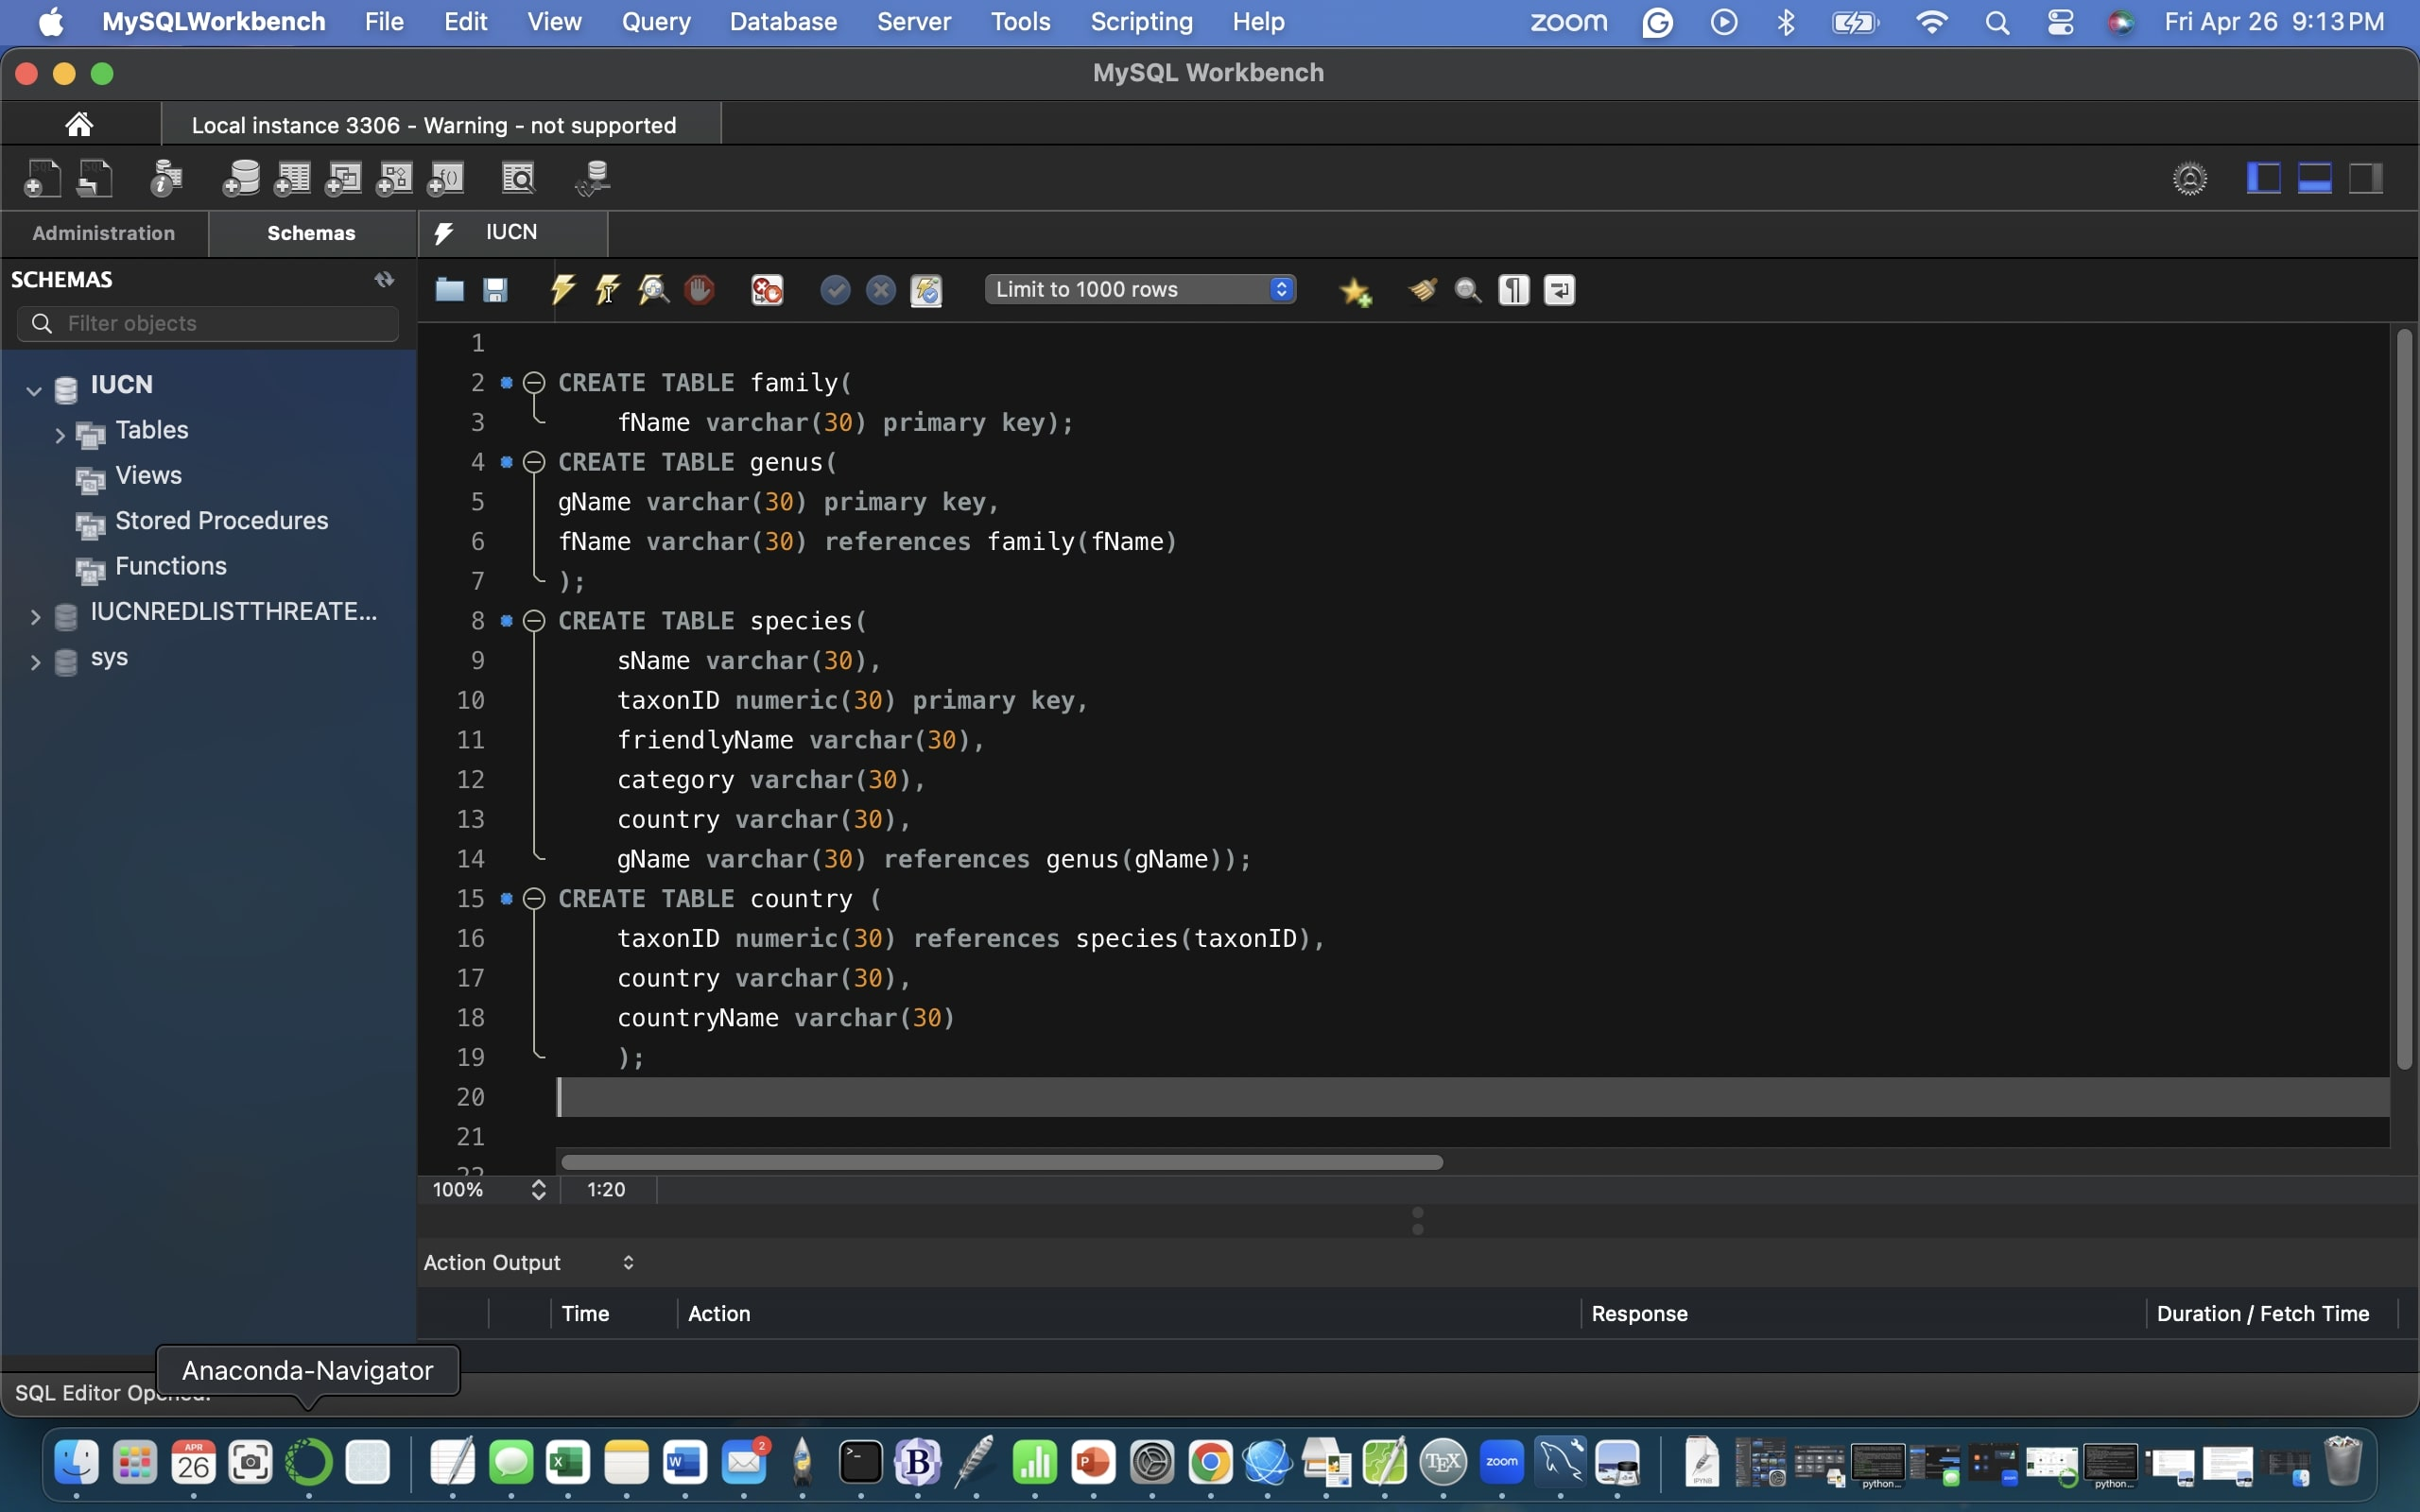

In [ ]:
from IPython.display import Image
Image(filename="/Users/hangtran/Desktop/AC0501/Module_7/IUCN_database_query.jpg")

## QUERYING THE DATABASE

In the IUCN project phase 2, a database called IUCN has been created. Now, the database will be queried to answer the question below:

Number of all the threatened species per family. Provide a pie chart of the data for the result of the query. The species with the category CR, EN, or VU are considered threatened species.

To save the result of the query, we use a view. Views are named queries stored in a database and act like tables. Views allow the reading and exporting of its content to a csv file.

The view below provide the answer for the question about the number of all threatened species per family:

    create view numspecies as
    select Count(s.sName) as NumOfThreatenedSpecies, g.fName as FamilyName
    from species s join genus g on s.gName = g.gName
    where s.category = "CR" or s.category = "EN" or s.category = "VU"
    group by g.fName
    order by g.fName asc;
   
To read the results of the query back into a Jupyter Notebooks dataframe, the view is exported into a csv. This is done by finding the view in the Connections page, highlight the numspecies under Views and click on the table symbol. A numspecies tab is opened and click on the Export symbol to export the view into a folder. Note: save the file as numspecies, choose the folder in the same folder as this Jupyter Notebook and choose format as CSV.


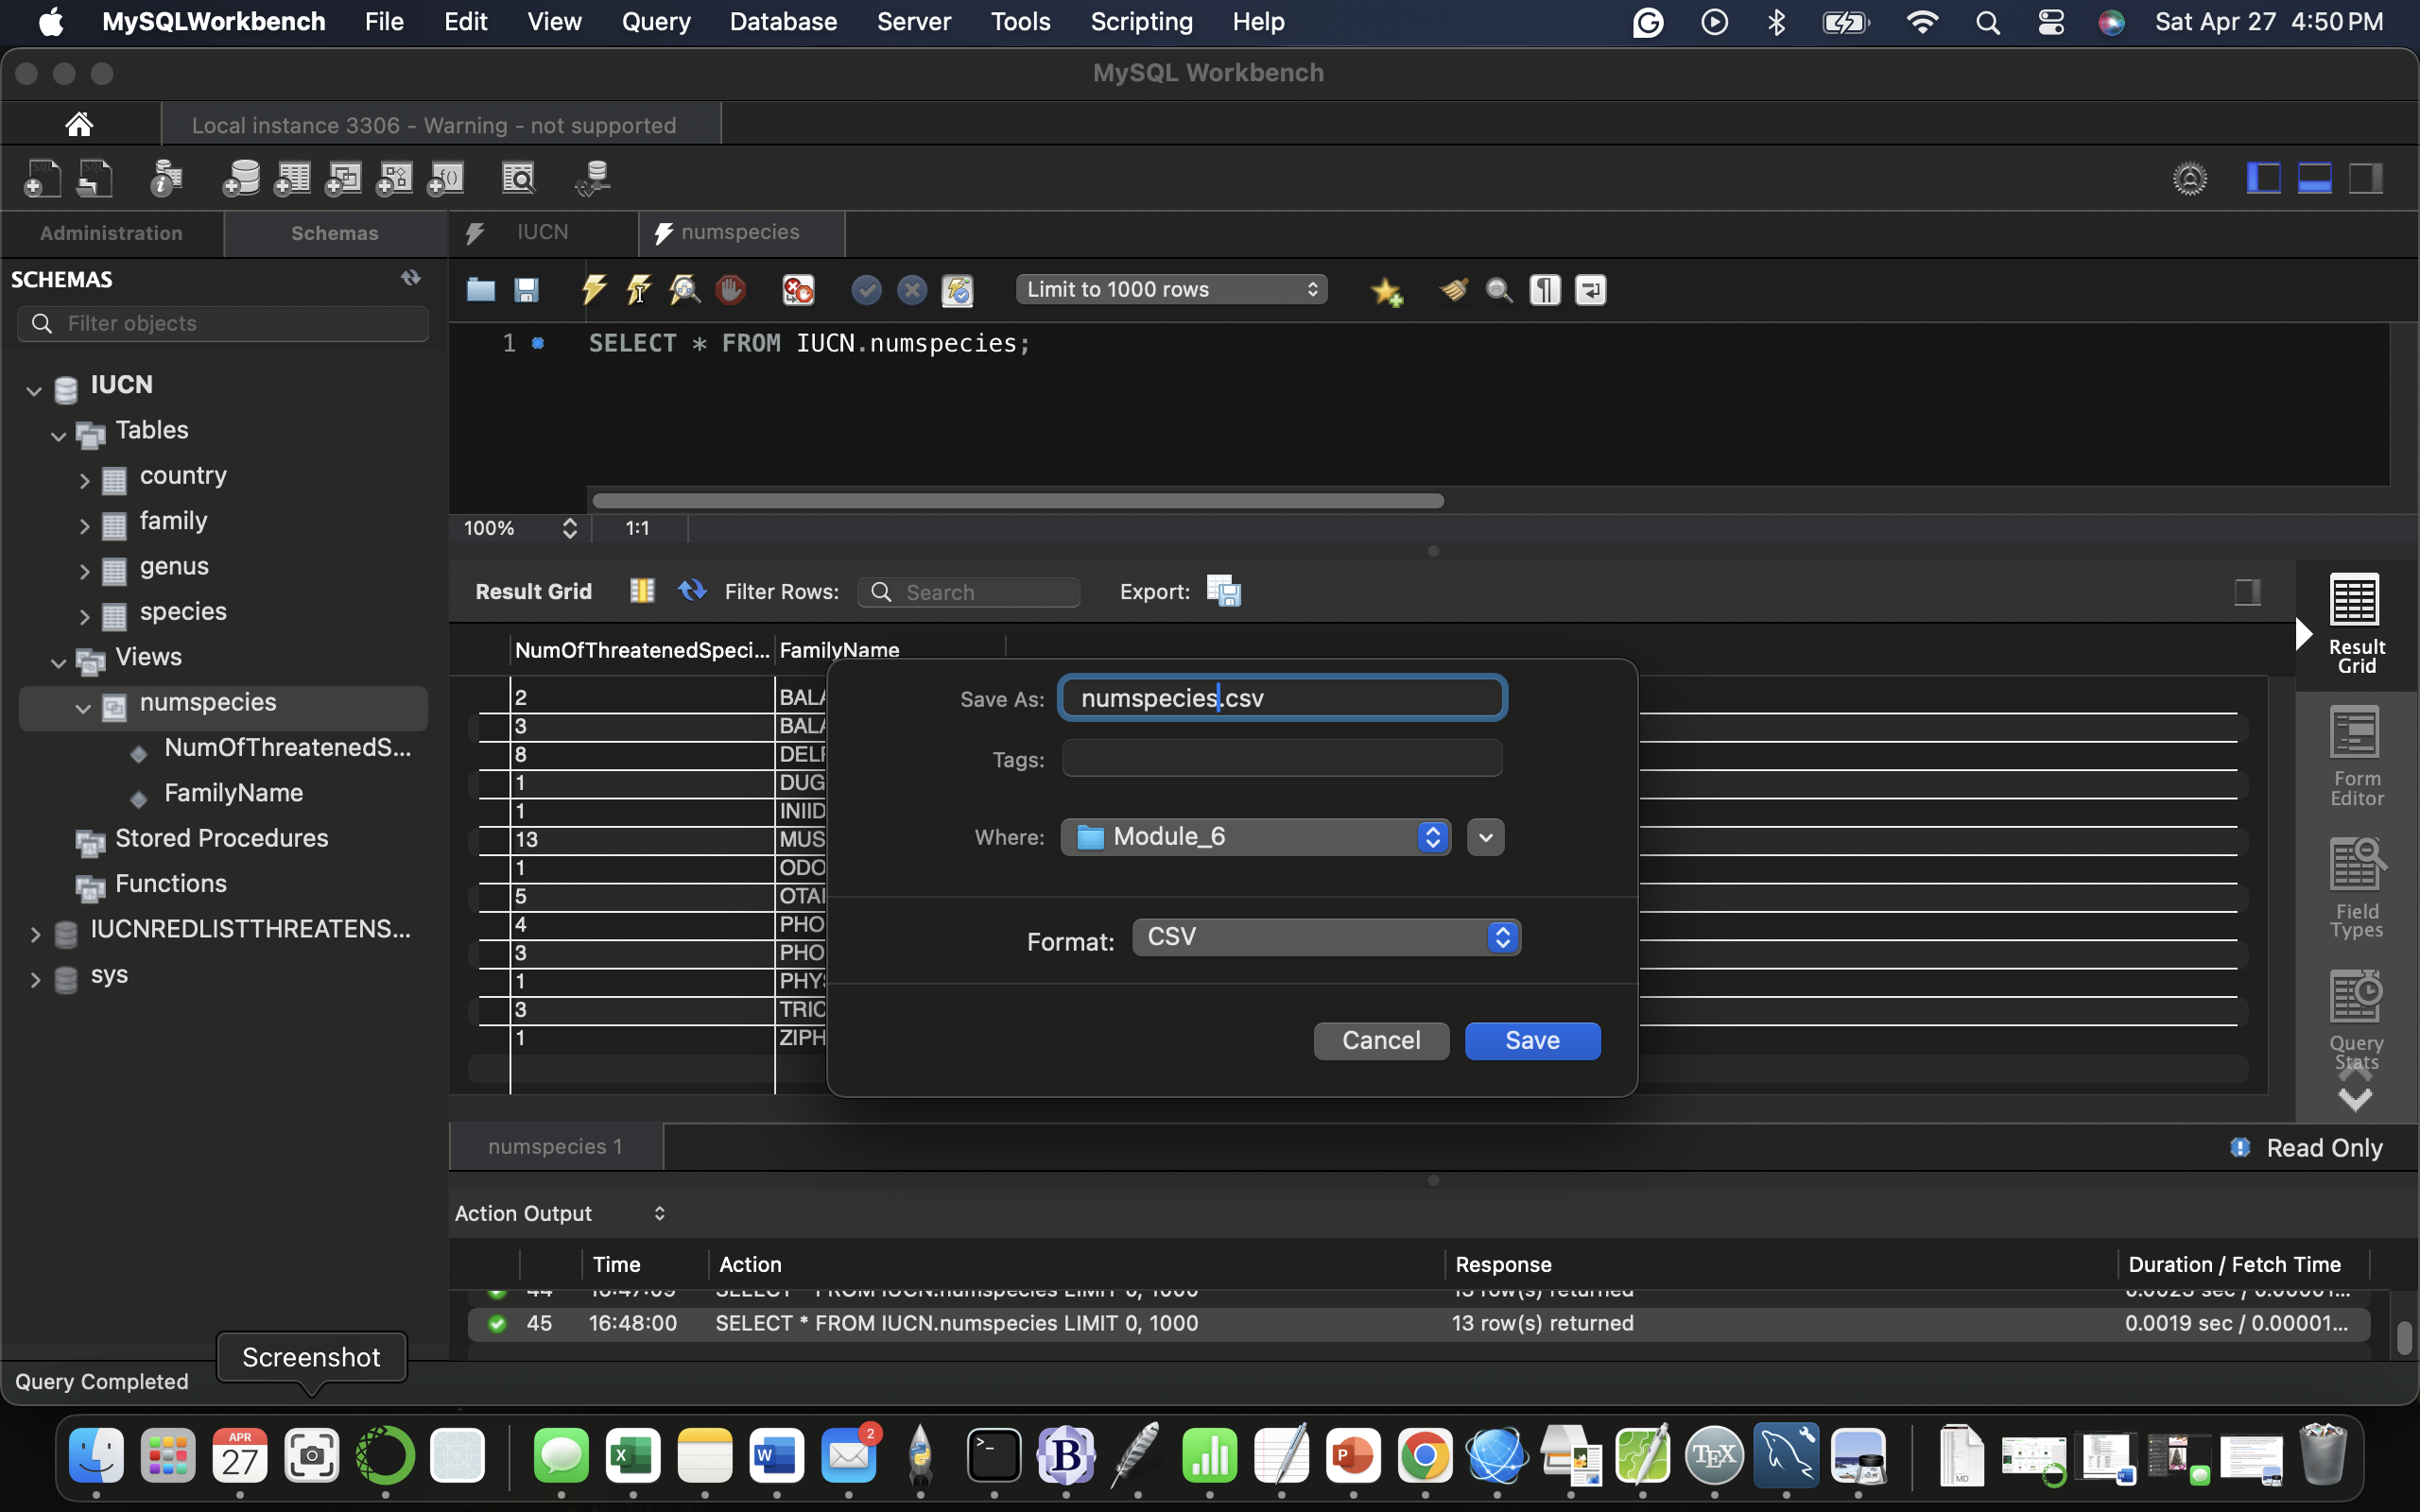

In [ ]:
from IPython.display import Image
Image("/Users/hangtran/Desktop/AC0501/Module_6/phase3.png")

In [ ]:
# read in the query result
speciesThreatened = pd.read_csv('/Users/hangtran/Desktop/AC0501/Module_6/numspecies.csv')
speciesThreatened.head(5)

,NumOfThreatenedSpecies,FamilyName
0,2,BALAENIDAE
1,3,BALAENOPTERIDAE
2,8,DELPHINIDAE
3,1,DUGONGIDAE
4,1,INIIDAE


## VISUALIZING DATA

To visualize the query data, use Matplotlib to plot the information. Matplotlib is a 2D plotting library used in Python. The Numpy package has useful method to transform and shape data before plotting. Numpy is a package that uses high-level mathematical functions on arrays and matrices.


### PIE CHART

Since the data from the query is categorical and we want to see what proportion of threatened species are associated with each family. The pie chart is utilized.

1. Index the speciesThreatened dataframe to isolate the Number of threatened species and the Family name
2. Use the plt.pie() function to plot the pie chart
    The first parameter takes the numeric sequence of values that are used to draw the proportions of the pie chart
    The named parameter labels takes the labels for each slice of the pie chart
    The named parameter counterclockwise specifies whether the pie chart should be drawn clockwise or counterclockwise
3. Use the plt.show() function to display the plot


In [ ]:
# Import the package
import matplotlib.pyplot as plt

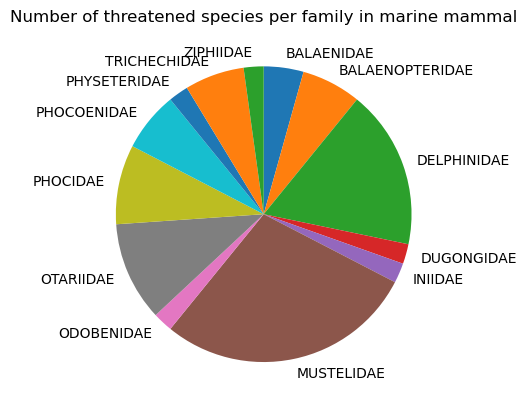

In [ ]:
# Get the values from the dataframe
numTS = speciesThreatened['NumOfThreatenedSpecies']
familyName = speciesThreatened['FamilyName']

# Plot the pie chart
wedges, labels = plt.pie(numTS, labels = familyName, startangle = 90, counterclock=False)

# Add info into the plot
plt.title("Number of threatened species per family in marine mammal")

# Show the plot
plt.show()


## DATA CALCULATION AND ANALYSIS

The percentage of each family is calculated as below
1. Use sum() function to find the total of all threatened species
2. Use for loop to iterate over each value in the numTS column, divide each value by total of all threatened species, multiply by 100 to convert to percentage and format the result with one decimal place
3. The result is appended to a list called percentage
4. Add the percentage to the dataframe as a new column called Percentage

In [ ]:
# Calculate the percentage of each family and add it to the df
totalnumTS = sum(numTS)
percentage = [f"{(num/totalnumTS) * 100:.1f}% " for num in numTS]
speciesThreatened['Percentage'] = percentage
print(speciesThreatened)

    NumOfThreatenedSpecies       FamilyName Percentage
0                        2       BALAENIDAE      4.3% 
1                        3  BALAENOPTERIDAE      6.5% 
2                        8      DELPHINIDAE     17.4% 
3                        1       DUGONGIDAE      2.2% 
4                        1          INIIDAE      2.2% 
5                       13       MUSTELIDAE     28.3% 
6                        1       ODOBENIDAE      2.2% 
7                        5        OTARIIDAE     10.9% 
8                        4         PHOCIDAE      8.7% 
9                        3      PHOCOENIDAE      6.5% 
10                       1     PHYSETERIDAE      2.2% 
11                       3     TRICHECHIDAE      6.5% 
12                       1        ZIPHIIDAE      2.2% 


In general, the most vulnerable family is MUSTELIDAE in the marine mammal (IUCN) database. The least vulnerable families are DUGONGIDAE, INIIDAE, ODOBENIDAE,PHYSETERIDAE, and ZIPHIIDAE. Knowing these information is crucial in allocating appropriate resources to protect and conserve these endangered species.